In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, recall_score, precision_score
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('Actual_dataset.csv')

In [3]:
df['label'].value_counts()

label
non-suicide    15000
suicide        12846
depression     10371
Name: count, dtype: int64

In [4]:
y_label = df['label']

In [5]:
df_1 = df.drop(columns=['label'])

In [6]:
df_1

,text
0,I recently went through a breakup and she said...
1,"I do not know how to navigate these feelings, ..."
2,"So I have been with my bf for 5 months , and h..."
3,I have been severly bullied since i was 5 till...
4,My mom made me go to a camp that she knows I h...
...,...
38212,I have math test Please wish me luck\nI fear.
38213,Lol i think everyone forgot me Thats fine I guess
38214,I'm done My bitch-ass step brother is a fuckin...
38215,Official leaked! u/MegaThicccÃ¢ÂÂs pronouns ...


In [7]:
X_train , X_test , y_train, y_test = train_test_split(df_1,y_label,test_size=0.2)

In [8]:
def remove_url(text):
    return re.sub(r"http\S+", "", text)

exclude =string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "" , exclude))


In [9]:
stopwords= stopwords.words('english')
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)
            

In [10]:
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

In [11]:
def preprocess(train_data):
    train_data['text']=train_data['text'].str.lower()
    train_data['text'] = train_data['text'].apply(remove_url)#remove url
    train_data['text']=train_data['text'].apply(remove_punctuation)# remove punctuation
    train_data['text']=train_data['text'].apply(remove_stopwords)
    train_data['text'] = train_data['text'].apply(lemmatize_text)

In [12]:
preprocess(X_train)

In [13]:
preprocess(X_test)

In [14]:
tfidf_vectorizer = TfidfVectorizer()

    # Fit-transform the  data
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train['text'])
test_tf = tfidf_vectorizer.transform(X_test['text'])
filename = 'tfidf_vectorizer.pik'
pickle.dump(tfidf_vectorizer, open(filename, 'wb')) 

In [15]:
y_label.value_counts()
y_lab = ['non-suicide' ,
'suicide' ,       
'depression' ]

Accuracy: 0.7836211407639979

Classification Report:
              precision    recall  f1-score   support

  depression       0.92      0.58      0.71      2020
 non-suicide       0.96      0.77      0.85      2998
     suicide       0.63      0.96      0.76      2626

    accuracy                           0.78      7644
   macro avg       0.84      0.77      0.78      7644
weighted avg       0.84      0.78      0.78      7644



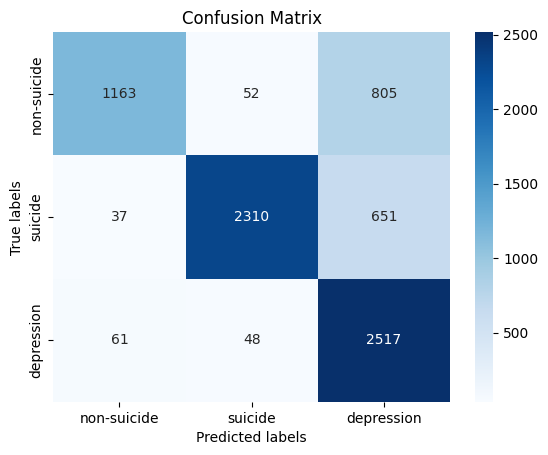

In [16]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_matrix, y_train)

# Make predictions
y_pred = nb_classifier.predict(test_tf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_lab,
            yticklabels=y_lab)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


filename = 'MN_1.pkl'
pickle.dump(nb_classifier, open(filename, 'wb'))

Validation Accuracy: 0.88003663003663
Classification Report:
               precision    recall  f1-score   support

  depression       0.86      0.90      0.88      2020
 non-suicide       0.88      0.93      0.90      2998
     suicide       0.89      0.81      0.85      2626

    accuracy                           0.88      7644
   macro avg       0.88      0.88      0.88      7644
weighted avg       0.88      0.88      0.88      7644



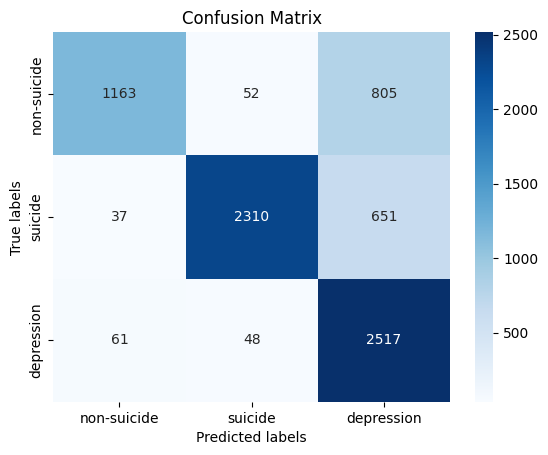

In [17]:
lr_model = LogisticRegression( random_state=42)

# Fit the model on the training data
lr_model.fit(tfidf_matrix, y_train)

y_pred_custom = lr_model.predict(test_tf)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred_custom)
classification_r = classification_report(y_test, y_pred_custom)
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", classification_r)

cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_lab,
            yticklabels=y_lab)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

filename = 'logistic.pkl'
pickle.dump(lr_model, open(filename, 'wb')) 

Validation Accuracy: 0.7704081632653061
Classification Report:
               precision    recall  f1-score   support

  depression       0.76      0.78      0.77      2020
 non-suicide       0.80      0.80      0.80      2998
     suicide       0.74      0.73      0.73      2626

    accuracy                           0.77      7644
   macro avg       0.77      0.77      0.77      7644
weighted avg       0.77      0.77      0.77      7644



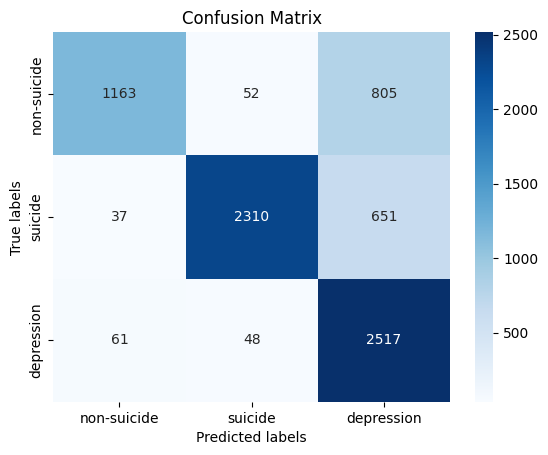

In [18]:
decision_tree = DecisionTreeClassifier( random_state=42)

# Fit the model on the training data
decision_tree.fit(tfidf_matrix, y_train)

y_pred_custom = decision_tree.predict(test_tf)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred_custom)
classification_r = classification_report(y_test, y_pred_custom)
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", classification_r)

cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_lab,
            yticklabels=y_lab)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

filename = 'decision_tree.pkl'
pickle.dump(decision_tree, open(filename, 'wb')) 

Validation Accuracy: 0.8434065934065934
Classification Report:
               precision    recall  f1-score   support

  depression       0.89      0.80      0.84      2020
 non-suicide       0.82      0.91      0.86      2998
     suicide       0.85      0.80      0.82      2626

    accuracy                           0.84      7644
   macro avg       0.85      0.84      0.84      7644
weighted avg       0.85      0.84      0.84      7644



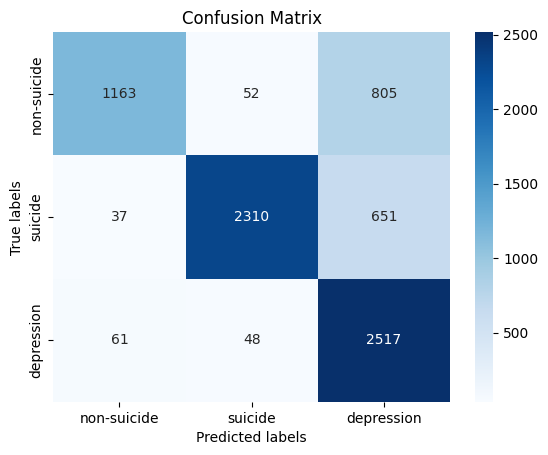

In [19]:
random_forest = RandomForestClassifier( random_state=42 , n_estimators=1000)

# Fit the model on the training data
random_forest.fit(tfidf_matrix, y_train)

y_pred_custom = random_forest.predict(test_tf)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred_custom)
classification_r = classification_report(y_test, y_pred_custom)
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", classification_r)

cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_lab,
            yticklabels=y_lab)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

filename = 'random_forest.pkl'
pickle.dump(random_forest, open(filename, 'wb')) 

In [20]:
results = [
    {'model': 'Multinomial Naive Base', 'accuracy': 0.75, 'recall': 0.75, 'precision': 0.83},
    {'model': 'LogisticRegression', 'accuracy': 0.88, 'recall': 0.88, 'precision': 0.88},
    {'model': 'Decision Tree', 'accuracy': 0.77, 'recall': 0.77, 'precision': 0.77},
    {'model': 'Random Forest', 'accuracy': 0.84, 'recall': 0.84, 'precision': 0.84}
]

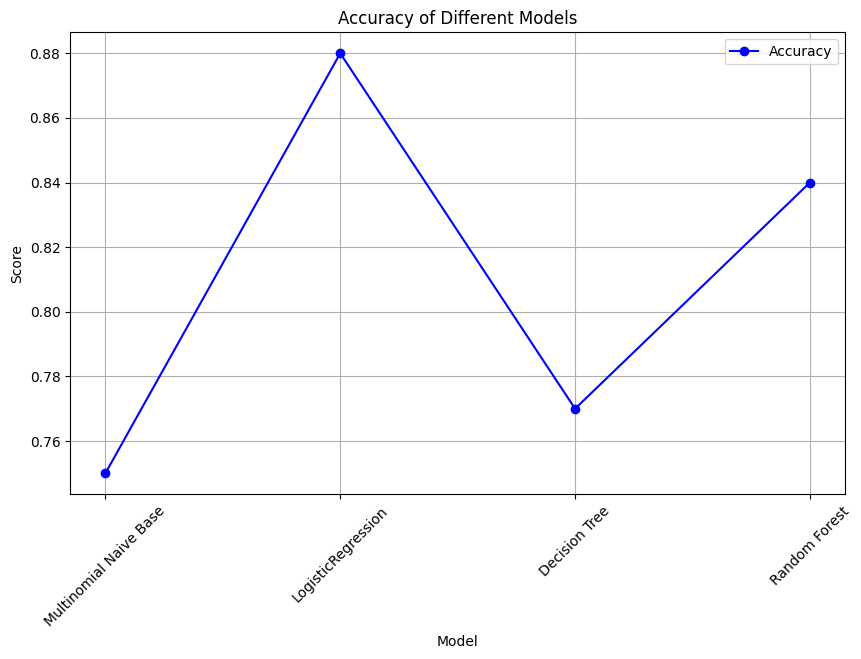

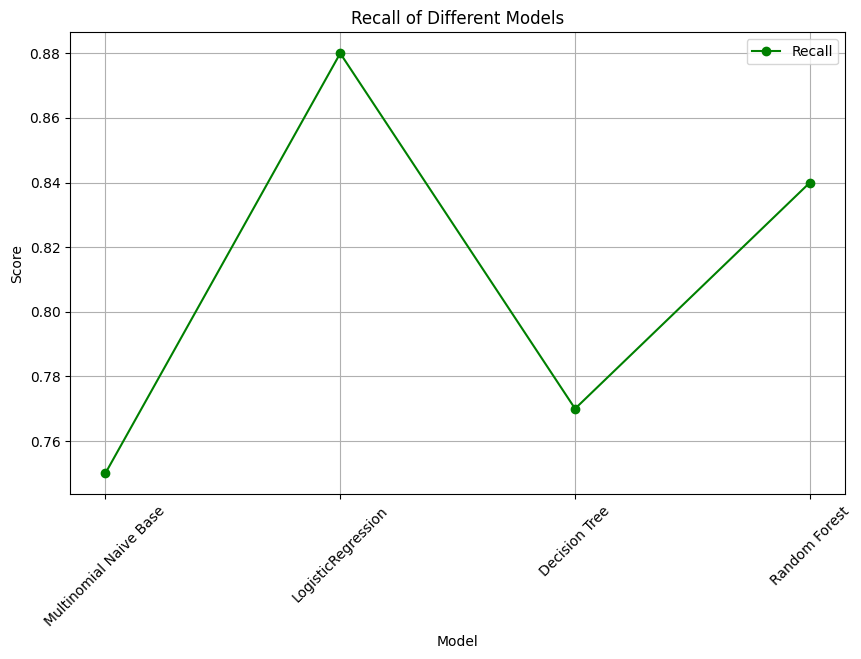

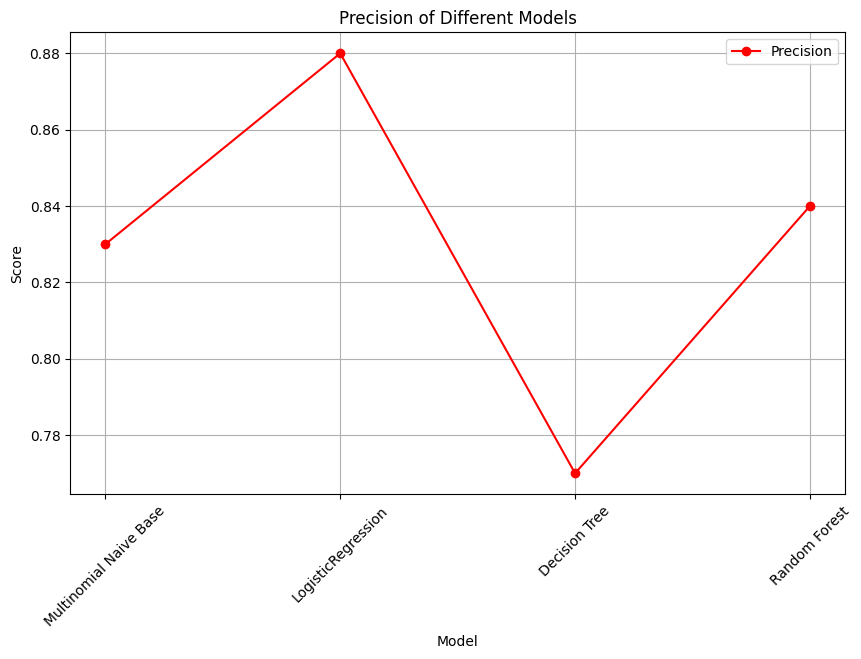

In [21]:
import matplotlib.pyplot as plt

# Data
labels = [result['model'] for result in results]
accuracy = [result['accuracy'] for result in results]
recall = [result['recall'] for result in results]
precision = [result['precision'] for result in results]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.plot(labels, accuracy, marker='o', label='Accuracy', color='b')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Recall plot
plt.figure(figsize=(10, 6))
plt.plot(labels, recall, marker='o', label='Recall', color='g')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Recall of Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Precision plot
plt.figure(figsize=(10, 6))
plt.plot(labels, precision, marker='o', label='Precision', color='r')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Precision of Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()
